In [120]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [121]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(type(boston_data))

<class 'sklearn.utils.Bunch'>


In [122]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [162]:
feature_data = boston_data['data']
feature_names = boston_data['feature_names']
target_data = boston_data['target']

print(type(feature_data))
print(type(target_data))

print(feature_data.shape)
print(target_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506,)


In [163]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [165]:
df = pd.DataFrame(feature_data, columns=boston_data['feature_names'])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [166]:
df['PRICE'] = target_data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [167]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [169]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [170]:

# Данный метод возвращает маску дубликатов
#   Если запись - дубликат, то в маске она будет True
# Получить DataFrame без дубликатов можно утем применения инвертированной маски
dup_mask = df.duplicated()

# А мы просто посмотрим сумму элементов и так убедимся, что дубликатов нет!
dup_mask.sum()

0

In [171]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [131]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [172]:
df['CHAS'] = df['CHAS'].astype(int).astype(dtype='category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    float64 
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(1), float64(13)
memory usage: 52.1 KB


C:\ju\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


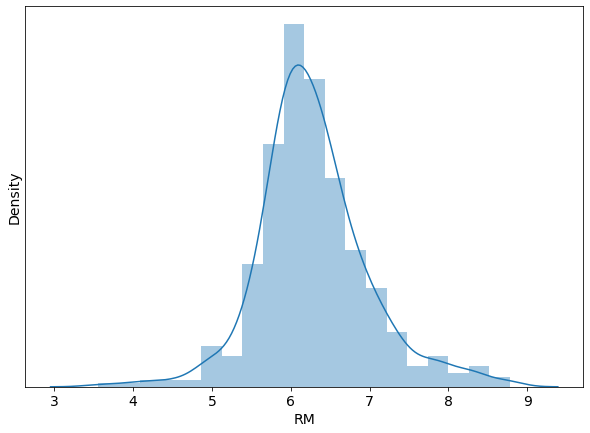

In [173]:
plt.figure(figsize=[10, 7])
sns.distplot(df['RM'], bins=20)
# Отключение меток на оси Y
plt.yticks([])
plt.show()

C:\ju\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ju\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


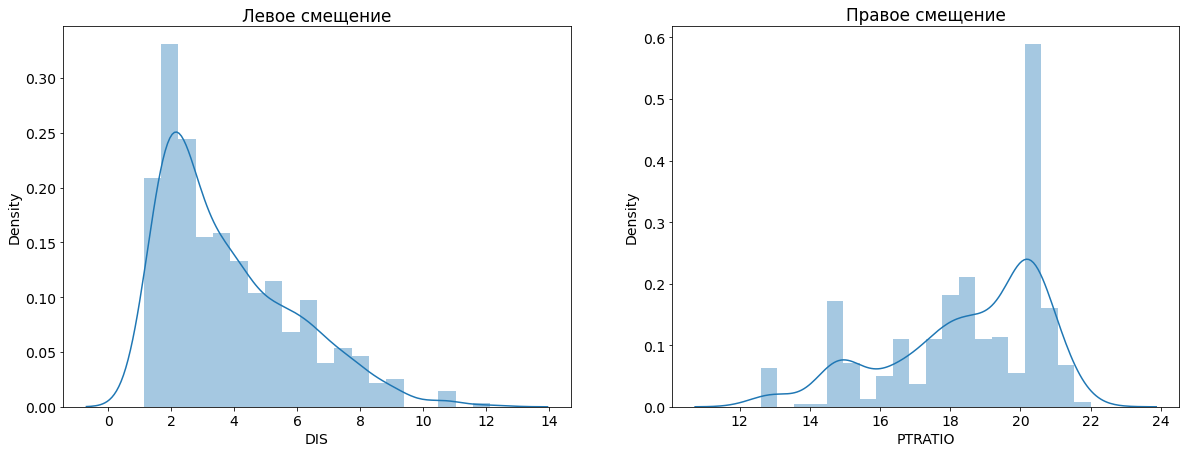

In [174]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=[20, 7])

sns.distplot(df['DIS'], ax=ax[0], bins=20)
ax[0].title.set_text('Левое смещение')

sns.distplot(df['PTRATIO'], ax=ax[1], bins=20)
ax[1].title.set_text('Правое смещение')

plt.show()

C:\ju\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


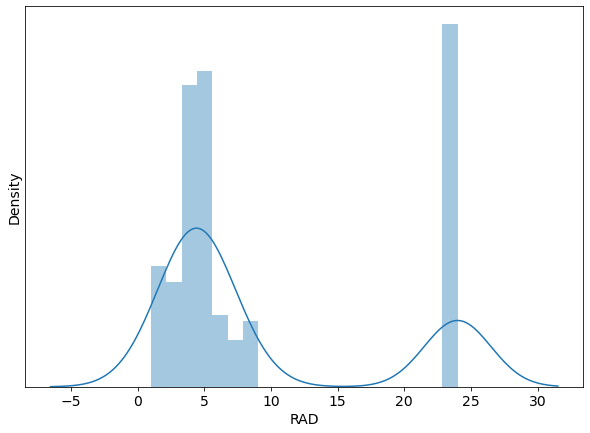

In [175]:
plt.figure(figsize=[10, 7])
sns.distplot(df['RAD'], bins=20)
# Отключение меток на оси Y
plt.yticks([])
plt.show()

In [176]:
features = ['CRIM', 'NOX', 'RM', 'PRICE']

correlation_mtrx = df[features].corr()
correlation_mtrx

,CRIM,NOX,RM,PRICE
CRIM,1.000000,0.420972,-0.219247,-0.388305
NOX,0.420972,1.000000,-0.302188,-0.427321
RM,-0.219247,-0.302188,1.000000,0.695360
PRICE,-0.388305,-0.427321,0.695360,1.000000


<AxesSubplot:>

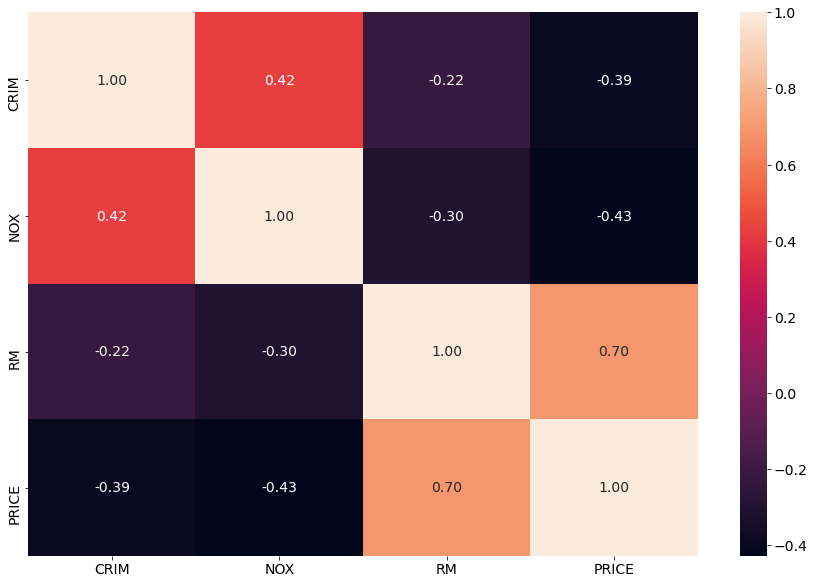

In [177]:
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

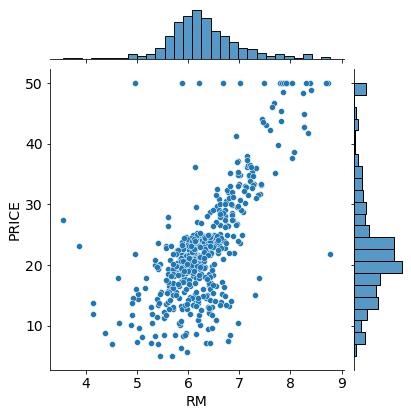

In [178]:
sns.jointplot(x="RM", y="PRICE", data=df)

In [179]:
outliers_count = df[df['PRICE'] == 50].shape[0]
print(outliers_count)
print(outliers_count/df.shape[0]*100)

16
3.1620553359683794


In [180]:
from sklearn.model_selection import train_test_split

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = df[feature_names]
# y - истинные значения (разметка)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

# Отображение размеров выборок
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


In [181]:
from sklearn.linear_model import LinearRegression

# Создаем объект
reg = LinearRegression()
# Обучаем на выборке для обучения
reg.fit(X_train, y_train)

LinearRegression()

In [145]:
# Для отображения весов создадим функцию
def show_linear_model_weights(model, feature_names=None):
    '''
    Отображение весов
    Аргументы:
        model - модель линейной регрессии
        feature_names - (опционально) если передано, отображение весов вместе с именами признаков
    '''
    print('\n----- Weights -----')
    weights = model.coef_
    bias = model.intercept_
    if feature_names is None:  
        print(f'Weights: {weights}')
    else:
        # Функция zip() делает из двух списков один список пар значений
        pairs = zip(feature_names, weights)
        for pair in pairs:
            print(f'{pair[0]} | {pair[1]}')

    print(f'Bias: {bias}')

show_linear_model_weights(reg, X_train.columns)


----- Weights -----
CRIM | -0.13347010285294725
ZN | 0.03580891359323623
INDUS | 0.049522645220052244
CHAS | 3.119835116285423
NOX | -15.417060895306776
RM | 4.057199231645376
AGE | -0.010820835184924181
DIS | -1.3859982431608782
RAD | 0.24272733982225161
TAX | -0.008702234365661957
PTRATIO | -0.9106852081102905
B | 0.011794115892575245
LSTAT | -0.5471133128239536
Bias: 31.63108403569186


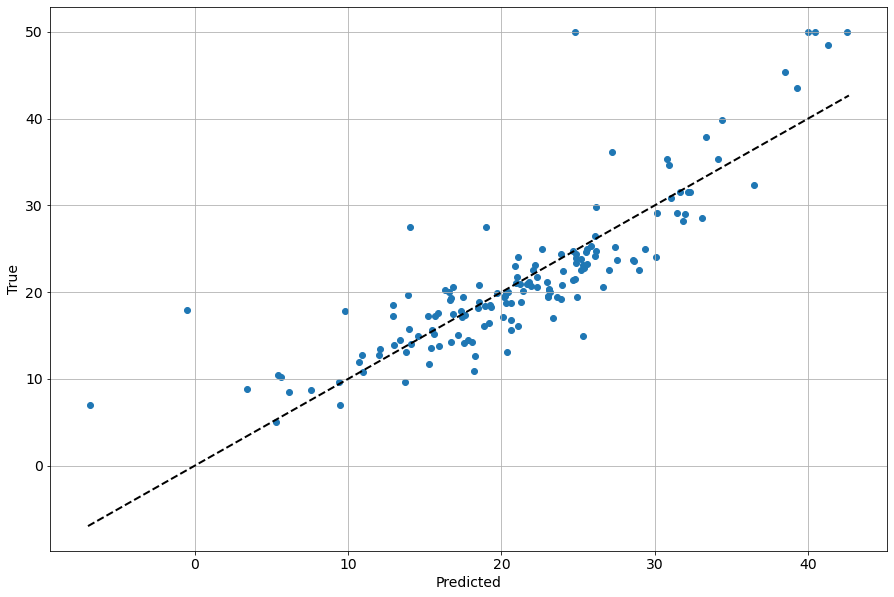

In [182]:
def draw_predictions_plot(y_pred, y_true):
    plt.scatter(y_pred, y_true)
    line_pnts = np.linspace(np.amin(y_pred)-0.1, np.amax(y_pred)+0.1, 1000)
    plt.plot(line_pnts, line_pnts, 'k--', lw=2)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.grid()

y_pred = reg.predict(X_test)
draw_predictions_plot(y_pred, y_test)

C:\ju\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


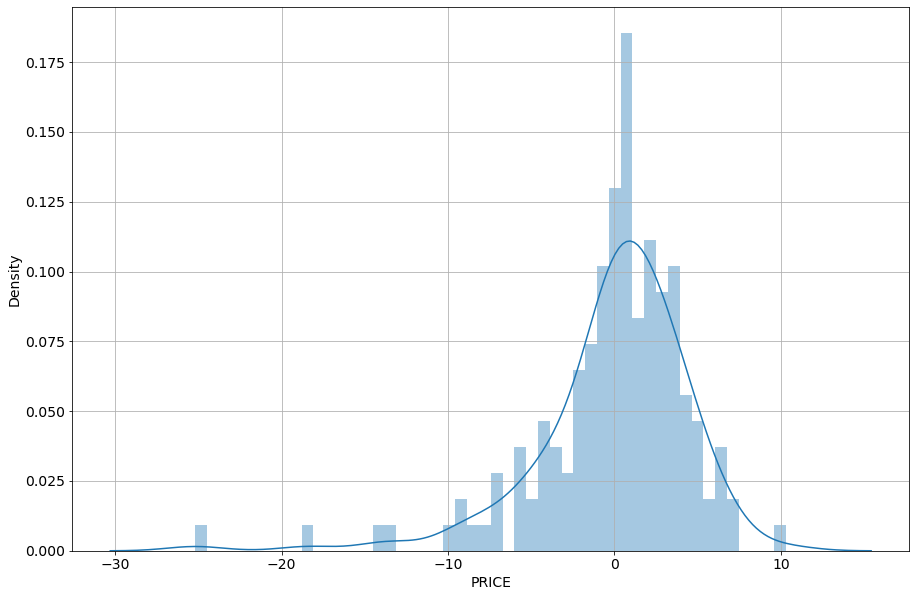

In [183]:
y_residuals = y_pred-y_test
sns.distplot(y_residuals, bins=50)
plt.grid()

In [184]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# При повторении кода лучшей практикой является создание функции 
#   для исключения дублирований
# Дублирование кода -> ошибки
def evaluate_regressor(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)

    print(f'\n----- Evaluation for {mode} -----')
    print(f'  R2: {r2_score_value}')
    print(f'  RMSE: {rmse_score}')
    print(f'  MAE: {mae_score}')

evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682007

----- Evaluation for test -----
  R2: 0.7112260057484903
  RMSE: 4.6386899261728445
  MAE: 3.1627098714574253


In [185]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)


----- Weights -----
CRIM | -1.108346015417753
ZN | 0.8084399775400867
INDUS | 0.34313465570479407
CHAS | 0.8138642573885848
NOX | -1.7980429490588945
RM | 2.913857995549767
AGE | -0.298939175503921
DIS | -2.9425114769806933
RAD | 2.094193030043762
TAX | -1.4470673128119864
PTRATIO | -2.0523223240868194
B | 1.0237518746406002
LSTAT | -3.8857900211493854
Bias: 23.01581920903955


In [186]:
# Отображаем средние значения и стандартные отклонения
# Количество значений соответствует количеству признаков
means = scaler.mean_
stds = scaler.var_

pairs = zip(X_test.columns, means, stds)
for pair in pairs:
    print(f'{pair[0]} | Mean: {pair[1]} | Std: {pair[2]}')

CRIM | Mean: 3.4698868644067797 | Std: 68.95769533571193
ZN | Mean: 11.403954802259888 | Std: 509.69840243863507
INDUS | Mean: 11.133050847457625 | Std: 48.00887148329024
CHAS | Mean: 0.07344632768361582 | Std: 0.06805196463340676
NOX | Mean: 0.5572593220338984 | Std: 0.013601817610839798
RM | Mean: 6.325672316384181 | Std: 0.5158032768042389
AGE | Mean: 68.7997175141243 | Std: 763.2100846659645
DIS | Mean: 3.7658740112994353 | Std: 4.507242983448881
RAD | Mean: 9.437853107344633 | Std: 74.43822815921351
TAX | Mean: 407.04237288135596 | Std: 27651.323063295986
PTRATIO | Mean: 18.277966101694915 | Std: 5.078723546873504
B | Mean: 359.70180790960455 | Std: 7534.572880912254
LSTAT | Mean: 12.421129943502825 | Std: 50.443369909668355


# Задание

<AxesSubplot:>

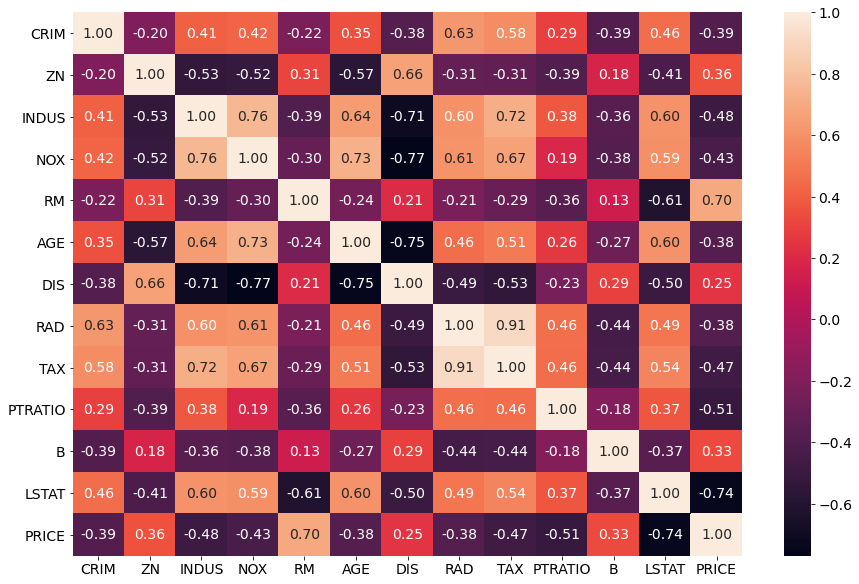

In [187]:
features = ['CRIM', 'ZN','INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT','PRICE']
correlation_mtrx = df[features].corr()
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

C:\ju\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ju\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ju\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureW

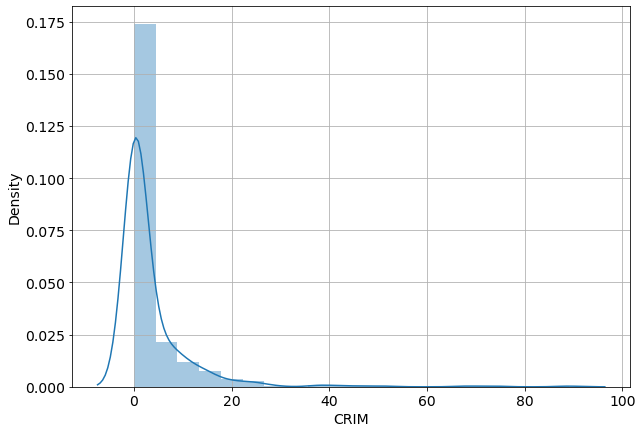

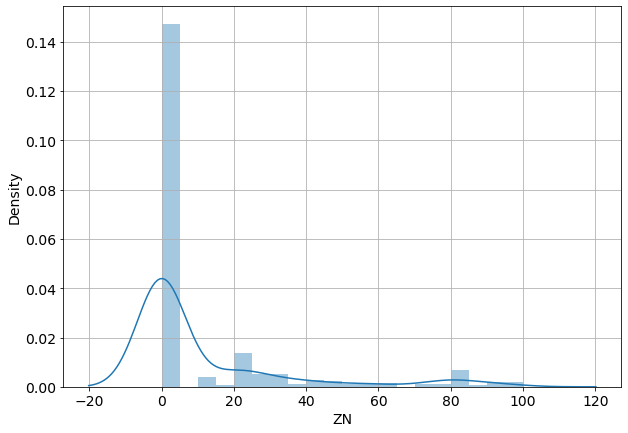

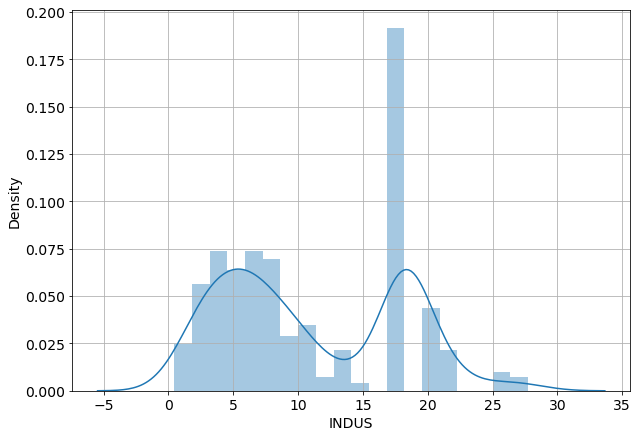

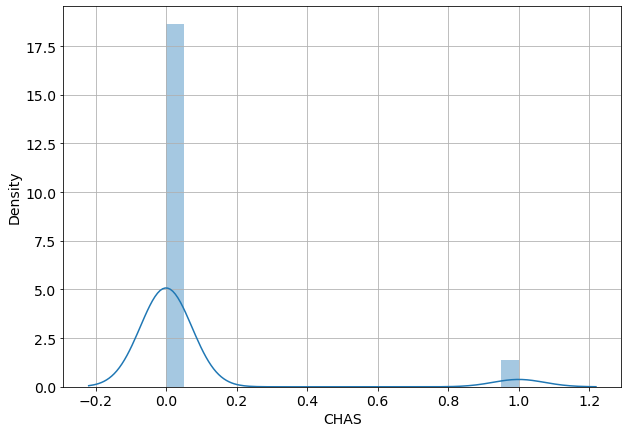

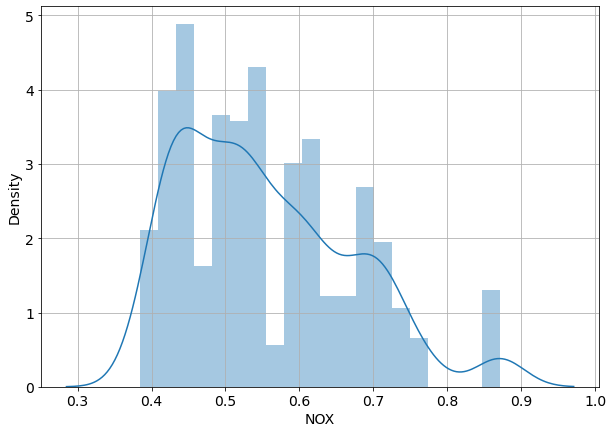

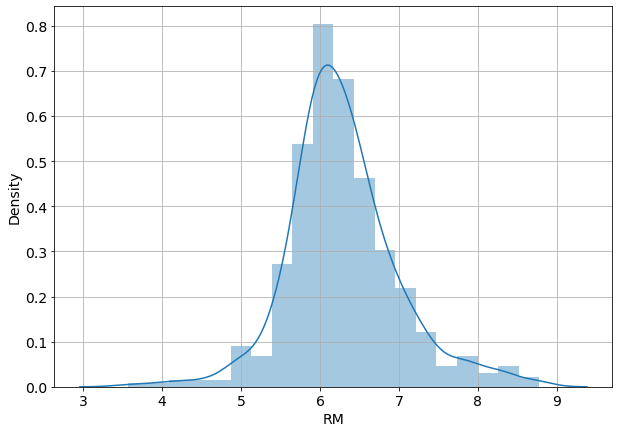

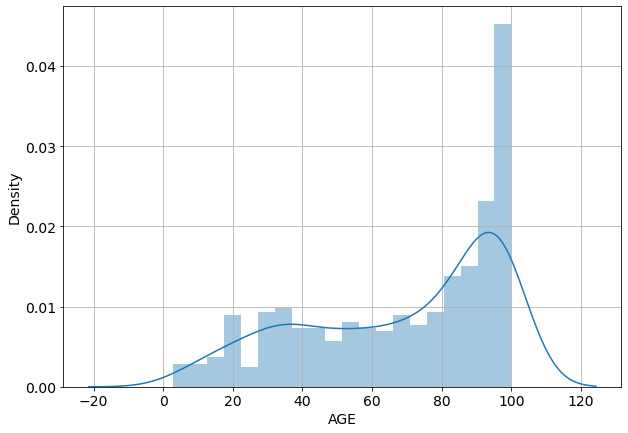

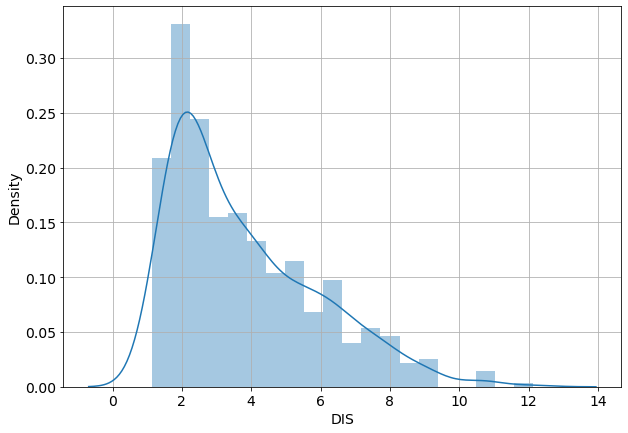

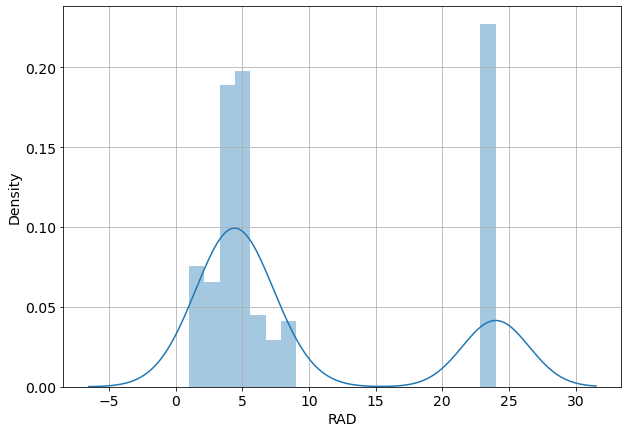

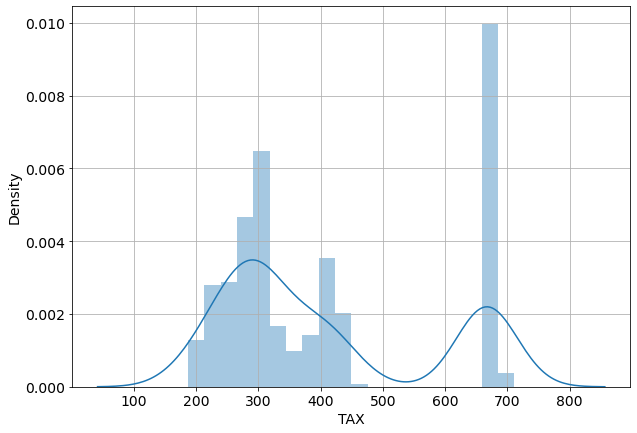

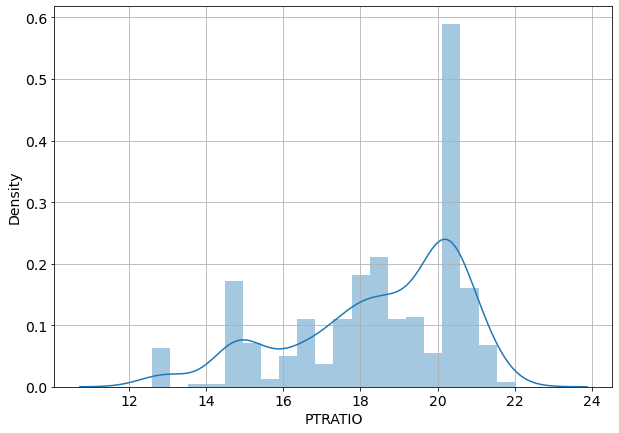

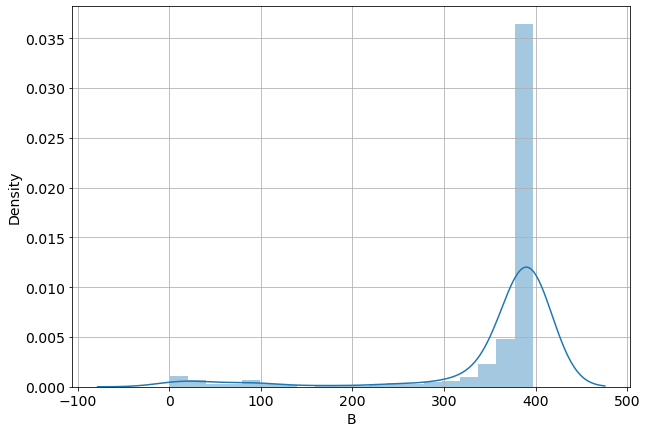

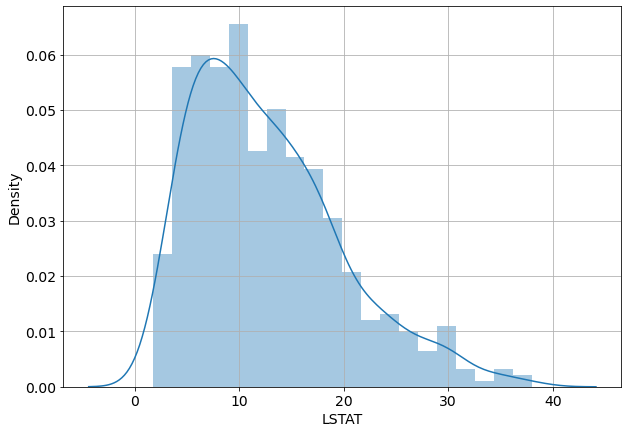

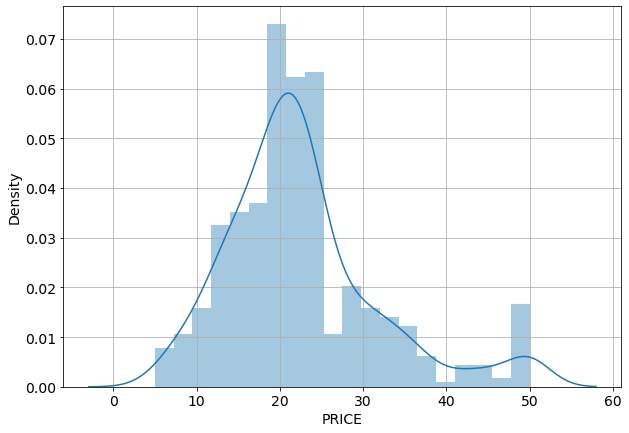

In [188]:
for i in features:
    plt.figure(figsize=[10, 7])
    sns.distplot(df[i], bins=20)
    plt.grid()

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


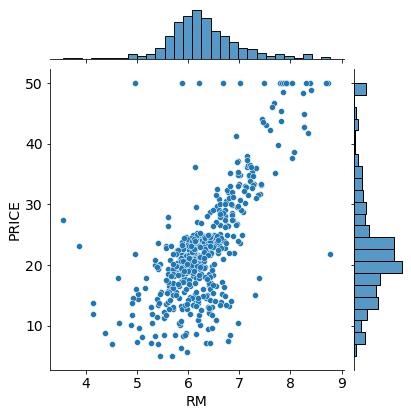

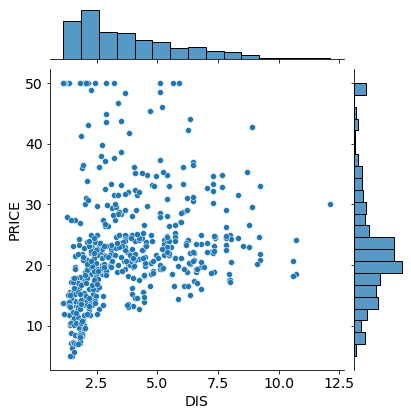

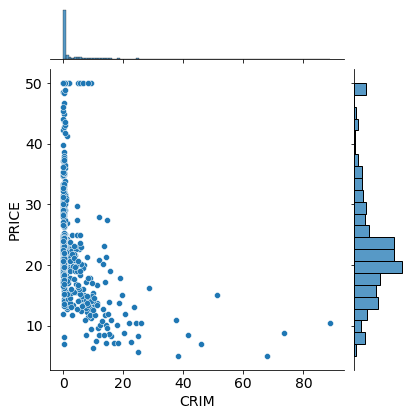

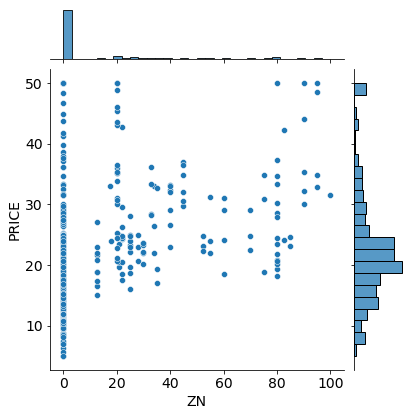

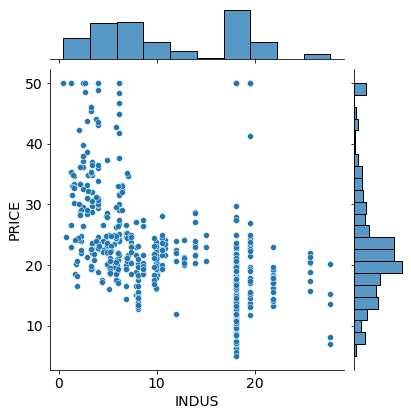

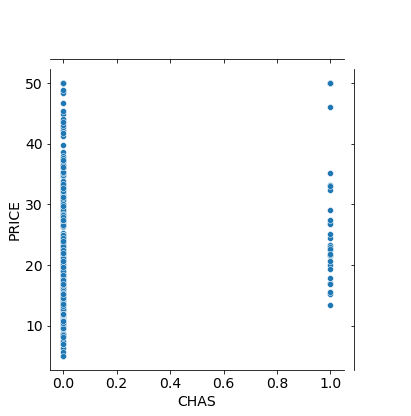

In [189]:
sns.jointplot(x="RM", y="PRICE", data=df);
sns.jointplot(x="DIS", y="PRICE", data=df);
sns.jointplot(x="CRIM", y="PRICE", data=df);
sns.jointplot(x="ZN", y="PRICE", data=df);
sns.jointplot(x="INDUS", y="PRICE", data=df);
sns.jointplot(x="CHAS", y="PRICE", data=df);



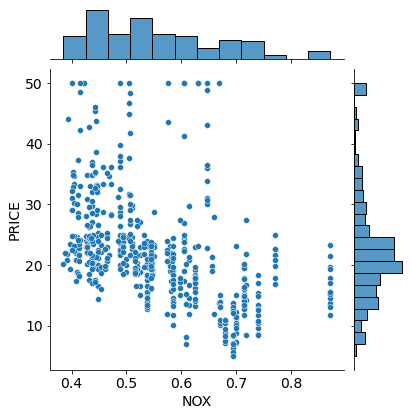

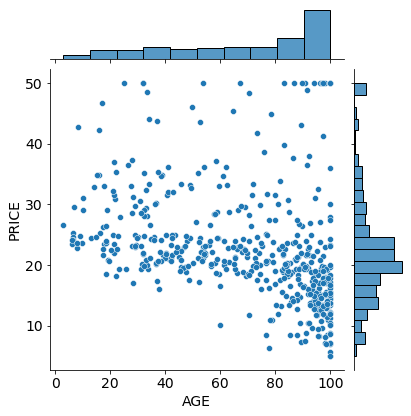

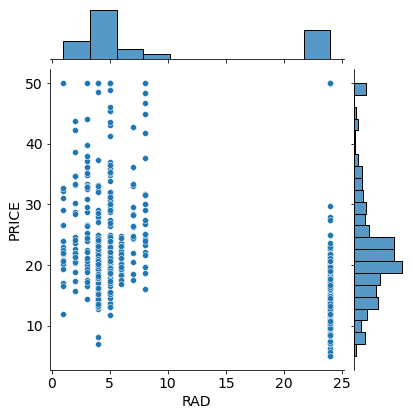

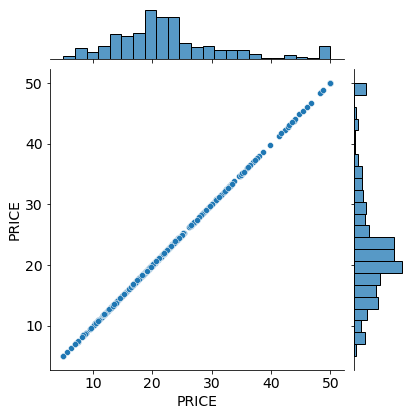

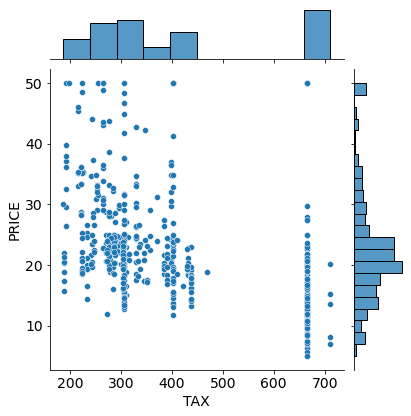

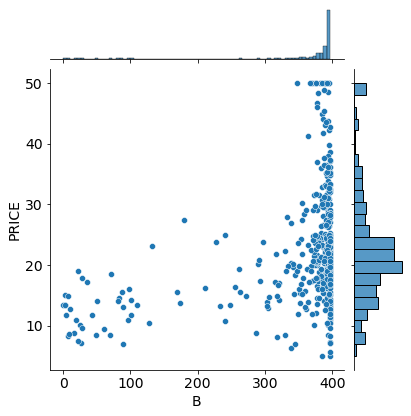

In [107]:
sns.jointplot(x="NOX", y="PRICE", data=df)
sns.jointplot(x="AGE", y="PRICE", data=df)
sns.jointplot(x="RAD", y="PRICE", data=df)
sns.jointplot(x="PRICE", y="PRICE", data=df)
sns.jointplot(x="TAX", y="PRICE", data=df)
sns.jointplot(x="B", y="PRICE", data=df)


----- Weights -----
CRIM | -1.108346015417753
ZN | 0.8084399775400867
INDUS | 0.34313465570479407
CHAS | 0.8138642573885848
NOX | -1.7980429490588945
RM | 2.913857995549767
AGE | -0.298939175503921
DIS | -2.9425114769806933
RAD | 2.094193030043762
TAX | -1.4470673128119864
PTRATIO | -2.0523223240868194
B | 1.0237518746406002
LSTAT | -3.8857900211493854
Bias: 23.01581920903955

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682056

----- Evaluation for test -----
  R2: 0.7112260057484932
  RMSE: 4.6386899261728205
  MAE: 3.1627098714574053


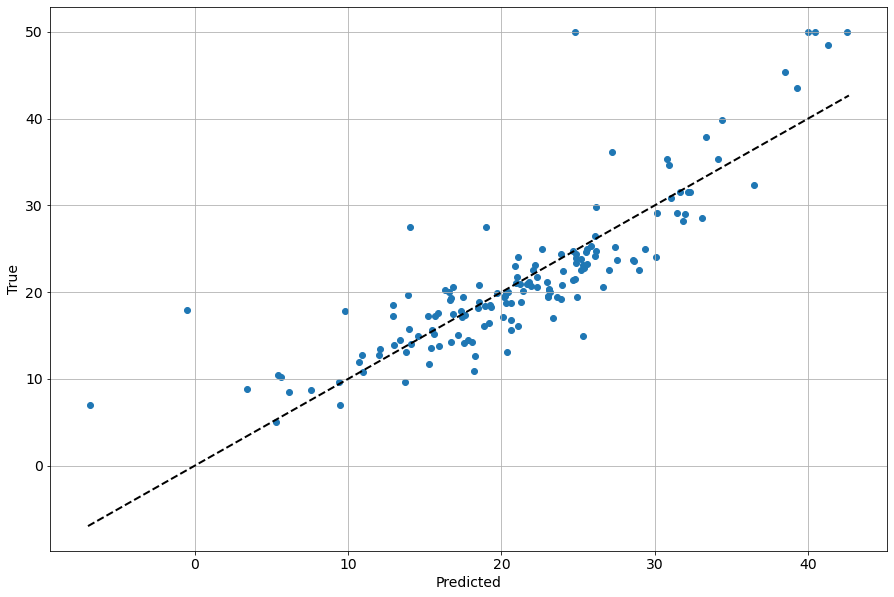

In [190]:
#работу инструментов нормализации данных:
#Примените трансформер sklearn.preprocessing.StandardScaler к данным, отобразите распределения после обработки, обучите модель на обработанных данных и оцените показатели;
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

C:\ju\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



----- Weights -----
CRIM | -0.131564664643942
ZN | 0.19951252047411328
INDUS | -0.661968941043374
CHAS | 0.8070988287388141
NOX | -1.5939759137391971
RM | 1.9532386683772813
AGE | 0.14000510013869538
DIS | -3.2702370734918675
RAD | 0.3842721775169008
TAX | 3.552713678800501e-15
PTRATIO | -1.6118671671696465
B | 0.5688864225523932
LSTAT | -5.812179493282584
Bias: 23.01581920903956

----- Evaluation for train -----
  R2: 0.7671674226821155
  RMSE: 4.523845209628152
  MAE: 3.3452541600761636

----- Evaluation for test -----
  R2: 0.7412232713454907
  RMSE: 4.391156466464551
  MAE: 3.1620670158148187


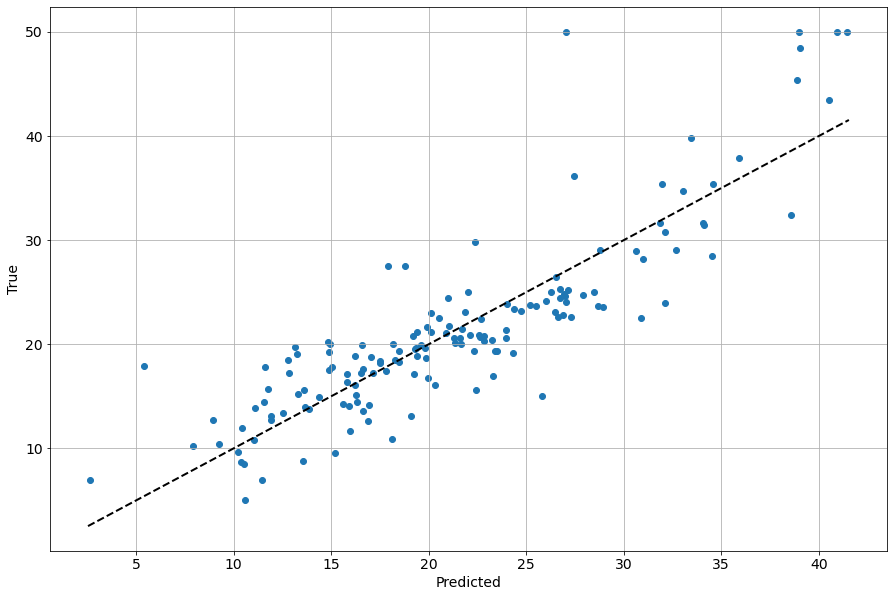

In [191]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

C:\ju\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



----- Weights -----
CRIM | -0.131564664643942
ZN | 0.19951252047411328
INDUS | -0.661968941043374
CHAS | 0.8070988287388141
NOX | -1.5939759137391971
RM | 1.9532386683772813
AGE | 0.14000510013869538
DIS | -3.2702370734918675
RAD | 0.3842721775169008
TAX | 3.552713678800501e-15
PTRATIO | -1.6118671671696465
B | 0.5688864225523932
LSTAT | -5.812179493282584
Bias: 23.01581920903956

----- Evaluation for train -----
  R2: 0.7671674226821155
  RMSE: 4.523845209628152
  MAE: 3.3452541600761636

----- Evaluation for test -----
  R2: 0.7412232713454907
  RMSE: 4.391156466464551
  MAE: 3.1620670158148187


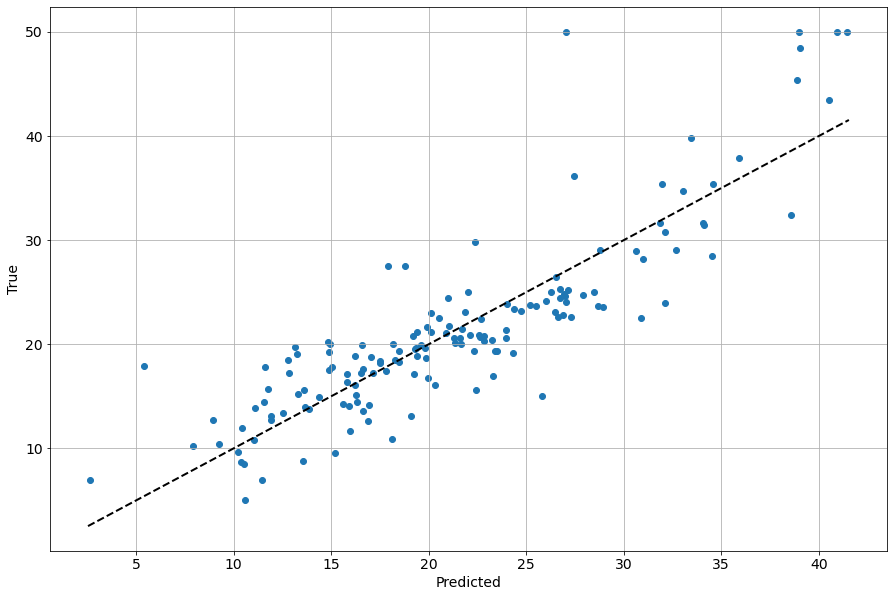

In [192]:
from sklearn.preprocessing import PowerTransformer

ptf = PowerTransformer()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

C:\ju\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



----- Weights -----
CRIM | -0.131564664643942
ZN | 0.19951252047411328
INDUS | -0.661968941043374
CHAS | 0.8070988287388141
NOX | -1.5939759137391971
RM | 1.9532386683772813
AGE | 0.14000510013869538
DIS | -3.2702370734918675
RAD | 0.3842721775169008
TAX | 3.552713678800501e-15
PTRATIO | -1.6118671671696465
B | 0.5688864225523932
LSTAT | -5.812179493282584
Bias: 23.01581920903956

----- Evaluation for train -----
  R2: 0.7671674226821155
  RMSE: 4.523845209628152
  MAE: 3.3452541600761636

----- Evaluation for test -----
  R2: 0.7412232713454907
  RMSE: 4.391156466464551
  MAE: 3.1620670158148187


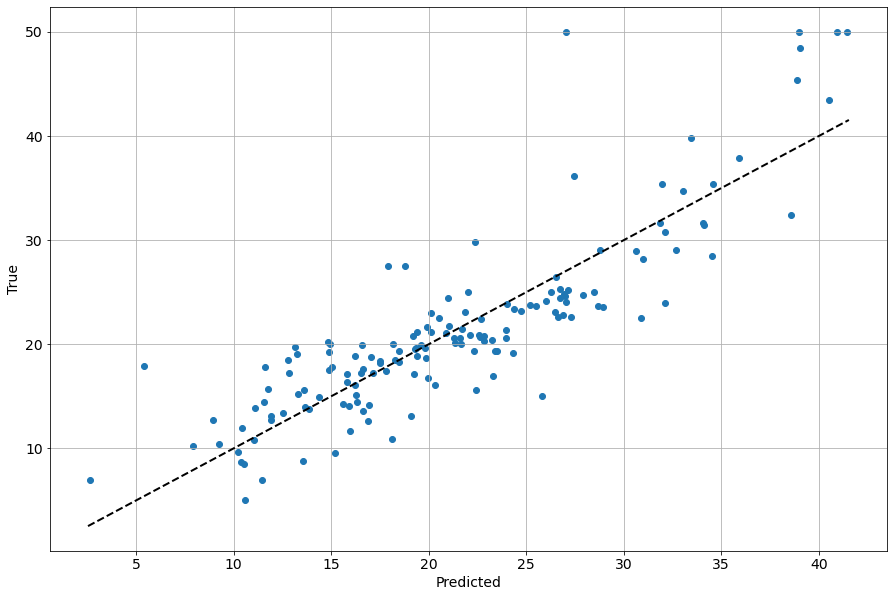

In [193]:
from sklearn.preprocessing import QuantileTransformer

qtf = QuantileTransformer
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

C:\ju\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



----- Weights -----
CRIM | -0.131564664643942
ZN | 0.19951252047411328
INDUS | -0.661968941043374
CHAS | 0.8070988287388141
NOX | -1.5939759137391971
RM | 1.9532386683772813
AGE | 0.14000510013869538
DIS | -3.2702370734918675
RAD | 0.3842721775169008
TAX | 3.552713678800501e-15
PTRATIO | -1.6118671671696465
B | 0.5688864225523932
LSTAT | -5.812179493282584
Bias: 23.01581920903956

----- Evaluation for train -----
  R2: 0.7671674226821155
  RMSE: 4.523845209628152
  MAE: 3.3452541600761636

----- Evaluation for test -----
  R2: 0.7412232713454907
  RMSE: 4.391156466464551
  MAE: 3.1620670158148187


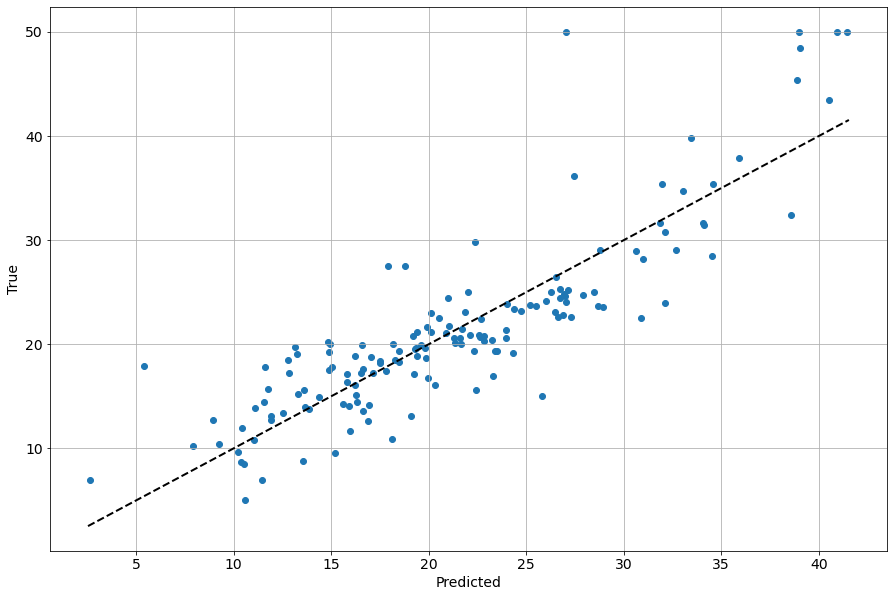

In [194]:
from sklearn.preprocessing import MinMaxScaler

Scaler= MinMaxScaler
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)


----- Weights -----
CRIM | -0.12381878117351515
ZN | 0.04038991169296723
INDUS | -0.04633642800193127
CHAS | -0.029973239830873747
NOX | -14.68806333367304
RM | 3.3332467194038777
AGE | -0.02129486820093257
DIS | -1.3881850773174025
RAD | 0.23160877762484663
TAX | -0.012433320325953956
PTRATIO | -0.8576286263011853
B | 0.006898412474272803
LSTAT | -0.3753130106657546
Bias: 37.55993342610537

----- Evaluation for train -----
  R2: 0.7798306337503476
  RMSE: 3.7782825897542445
  MAE: 2.79615041471407

----- Evaluation for test -----
  R2: 0.7538446825846036
  RMSE: 3.5951405792699216
  MAE: 2.7775138468973397


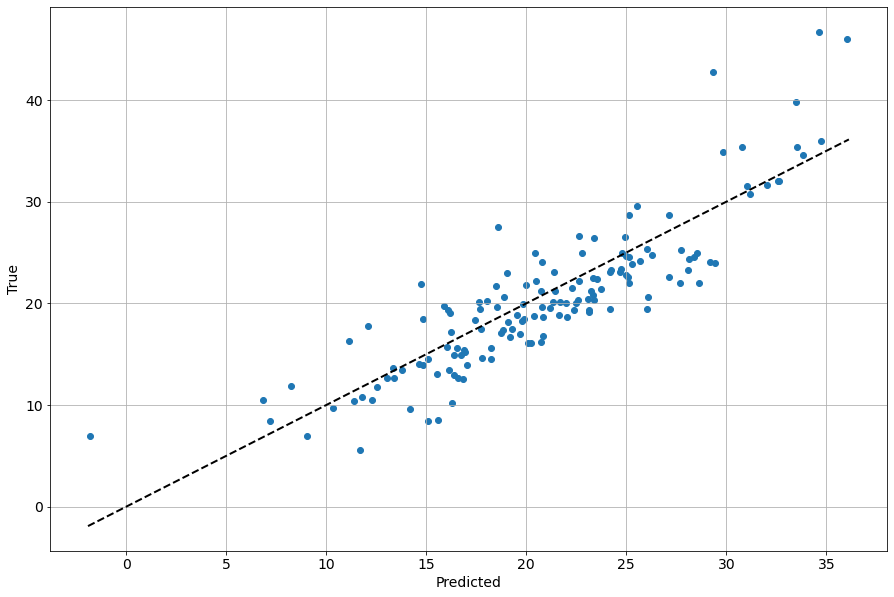

In [195]:
counter=df[df['PRICE']==50].index
df1=df.drop(counter,axis=0)

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = df1[feature_names]
# y - истинные значения (разметка)
y = df1['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)
reg.fit(X_train, y_train)
show_linear_model_weights(reg, X_train.columns)
evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')
y_pred = reg.predict(X_test)
draw_predictions_plot(y_pred, y_test)